In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show, curdoc, save
from bokeh.plotting import figure, output_file
from datetime import datetime as dt
output_notebook()
curdoc().theme = 'dark_minimal'

Loading BokehJS ...

In [13]:
# Cleanup
# Leer Spalten entfernen
# Leerzeichen aus den Spaltentitel um via . Notation an die Daten zu gelangen
# Datum / Uhrzeit und Datum Uhrzeit konvertieren

df = pd.read_csv(filepath_or_buffer='Data-Logger - sensor_1.csv', decimal=',',parse_dates=True)
df_1 = df.drop(columns=['Unnamed: 3','Unnamed: 9', 'Unnamed: 10', 'Ausensensor'])

df_2 = df_1.rename(columns={x:str.replace(x," ", "") for x in df_1.keys()})
dtm = lambda x: dt.strptime(x, '%d.%m.%Y %H:%M:%S')
df_2["DateTime"] = df_2.Timestamp.apply(dtm)

In [14]:
# Temperturen Plot
p = figure(title='Temperaturen', x_axis_label='x', y_axis_label='y',x_axis_type='datetime', width=900, height=400)

p.line(df_2.DateTime, df_2.TemperaturSensor2, legend_label='Thermometer Sensor 1', line_width=2, line_color='red')
p.line(df_2.DateTime, df_2.KabelThermometer, legend_label='Thermometer Kabel', line_width=2, line_color='green')

show(p) # show the results
# und als html speicherni
output_file(filename="tempplot.html", title="Temperaturen")
save(p)

'b:\\Data\\Dev\\datapy\\tempplot.html'

In [15]:
# RSSI
p = figure(width=1200, height=400, title='RSSI Verteilung')
p.circle(df_2.DateTime, df_2.RSSI, size=10,fill_color="green" )
p.square(df_2.DateTime, df_2.KabelThermometer, size=10, fill_color="yellow")
show(p)

<Axes: >

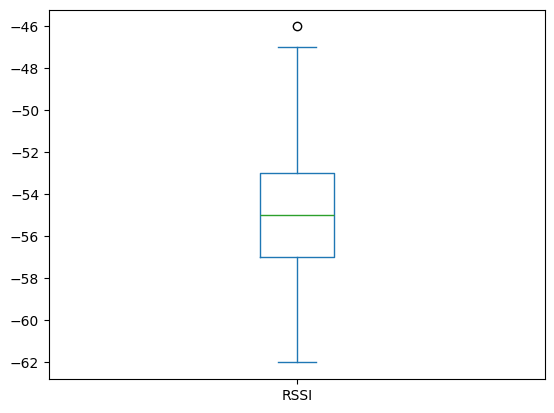

In [16]:
df_2.RSSI.plot.box()

<Axes: >

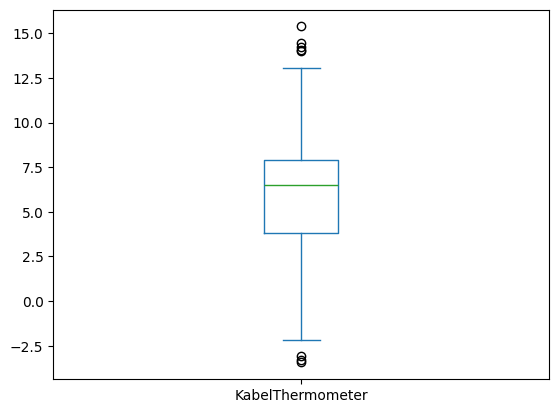

In [17]:
df_2.KabelThermometer.plot.box()

In [54]:
# Daten mit Feather speichern

df_2.to_pickle(path='data.pickle.zip', compression='infer')
df_2.to_feather(path='data.feather')

In [26]:
df_2.KabelThermometer.quantile([0.25,0.50,0.75,0.95])

0.25    3.81
0.50    6.50
0.75    7.88
0.95    9.44
Name: KabelThermometer, dtype: float64

In [1]:
df_2.RSSI.linespace(2.0,3.0)

NameError: name 'df_2' is not defined

In [28]:
df_2.RSSI.quantile([0.1,0.25,0.50,0.75,0.95])

0.10   -58.0
0.25   -57.0
0.50   -55.0
0.75   -53.0
0.95   -51.0
Name: RSSI, dtype: float64

In [20]:
# Hexenkulte

janein = lambda x : True if x.lower() == 'ja' else False

hexen = pd.read_csv(filepath_or_buffer='hexenkulte.csv', converters={'Tieropfer': janein, 'Ziegen': janein, 'Menschenopfer': janein}, sep=';')

hexen_2 = hexen.rename(columns={x:str.replace(x," ", "") for x in hexen.keys()})

hexen_2


,Hexenkult,Eigenschaften,MöglicheQuellen,ErstmaligeErscheinungalsJahr,Ausrichtung,Tieropfer,Ziegen,Menschenopfer,Mitgliedergeschätzt,Vorkommen
0,Sabbat der Hexen,"Schwarze Magie, rituelle Tänze, Sabbatfeiern","Hexenhammer von Heinrich Kramer, ""Hexenjagd"" v...",15. Jahrhundert,Böse,True,True,True,1000,Europa
1,Zirkel der Natur,"Naturmagie, Druidenrituale, Verehrung von Elem...",Die Nebel von Avalon von Marion Zimmer Bradley...,1983,Gut,False,False,False,500,"Europa, Nordamerika"
2,Orden der Schatten,"Dunkle Rituale, Blutmagie, Pakt mit Dämonen",Der Hexer von Andrzej Sapkowski (The Witcher-R...,1993,Böse,True,False,True,300,"Europa, Osteuropa"
3,Luna's Anhänger,"Mondmagie, hellseherische Fähigkeiten, Mysterien","Practical Magic von Alice Hoffman, ""Luna: New ...",1995,Gut,False,False,False,200,"Europa, Nordamerika"
4,Kult des Verborgenen Auges,"Okkulte Geheimnisse, Beschwörungen, Anbetung d...","Der Name des Windes von Patrick Rothfuss, ""Die...",2007,Gut,False,False,True,150,"Europa, Nordamerika"
5,Pennywise-Kult,"Angstmanipulation, Gestaltwandel, Opfergaben",Es von Stephen King,1986,Böse,True,False,True,500,Nordamerika
6,Kult der Cyberschleier,"Digitale Magie, Hacker-Rituale, Verehrung von ...","Neuromancer von William Gibson, ""Snow Crash"" v...",1984,Böse,False,False,False,1000,"Weltweit, insbesondere Nordamerika, Asien"
7,Logarithmische Illuminati,"Geheime Verschwörungen, Algorithmische Mysterien","Cryptonomicon von Neal Stephenson, ""Daemon"" vo...",1999,Böse,False,False,True,300,Weltweit
8,Cyber-Schattenzirkel,"Hacking-Rituale, Anbetung von künstlicher Inte...","Matrix (Film), ""Daemon"" von Daniel Suarez",1999,Böse,False,False,False,200,Weltweit
9,Firewall-Hexenorden,"Schutzzauber für Netzwerke, digitale Verteidig...",Science-Fiction-Literatur im Bereich künstlich...,2010,Gut,False,False,False,150,Weltweit


In [25]:
ganzueble = hexen_2[(hexen_2.Menschenopfer==True) & (hexen_2.Ziegen==True)] 
ganzueble

,Hexenkult,Eigenschaften,MöglicheQuellen,ErstmaligeErscheinungalsJahr,Ausrichtung,Tieropfer,Ziegen,Menschenopfer,Mitgliedergeschätzt,Vorkommen
0,Sabbat der Hexen,"Schwarze Magie, rituelle Tänze, Sabbatfeiern","Hexenhammer von Heinrich Kramer, ""Hexenjagd"" v...",15. Jahrhundert,Böse,True,True,True,1000,Europa
12,Dämonenpakt-Orden,"Dämonenbeschwörung, Seelenhandel, dunkle Verträge","Ruf der Verdammnis von Dämonenbeschwörer, ""Sch...",1723,Böse,True,True,True,100,"Europa, Südamerika"
26,Flammenherz-Orden,"Feuermagie, Herzopfer im Feuer, Anbetung des F...","Flammende Opfer von Feuerpriester, ""Herz aus F...",1776,Böse,True,True,True,400,"Europa, Nordamerika, Südamerika"


In [29]:
hexen_2['len'] = hexen_2.Vorkommen.apply(lambda x: x.split(','))
hexen_2

,Hexenkult,Eigenschaften,MöglicheQuellen,ErstmaligeErscheinungalsJahr,Ausrichtung,Tieropfer,Ziegen,Menschenopfer,Mitgliedergeschätzt,Vorkommen,len
0,Sabbat der Hexen,"Schwarze Magie, rituelle Tänze, Sabbatfeiern","Hexenhammer von Heinrich Kramer, ""Hexenjagd"" v...",15. Jahrhundert,Böse,True,True,True,1000,Europa,[Europa]
1,Zirkel der Natur,"Naturmagie, Druidenrituale, Verehrung von Elem...",Die Nebel von Avalon von Marion Zimmer Bradley...,1983,Gut,False,False,False,500,"Europa, Nordamerika","[Europa, Nordamerika]"
2,Orden der Schatten,"Dunkle Rituale, Blutmagie, Pakt mit Dämonen",Der Hexer von Andrzej Sapkowski (The Witcher-R...,1993,Böse,True,False,True,300,"Europa, Osteuropa","[Europa, Osteuropa]"
3,Luna's Anhänger,"Mondmagie, hellseherische Fähigkeiten, Mysterien","Practical Magic von Alice Hoffman, ""Luna: New ...",1995,Gut,False,False,False,200,"Europa, Nordamerika","[Europa, Nordamerika]"
4,Kult des Verborgenen Auges,"Okkulte Geheimnisse, Beschwörungen, Anbetung d...","Der Name des Windes von Patrick Rothfuss, ""Die...",2007,Gut,False,False,True,150,"Europa, Nordamerika","[Europa, Nordamerika]"
5,Pennywise-Kult,"Angstmanipulation, Gestaltwandel, Opfergaben",Es von Stephen King,1986,Böse,True,False,True,500,Nordamerika,[Nordamerika]
6,Kult der Cyberschleier,"Digitale Magie, Hacker-Rituale, Verehrung von ...","Neuromancer von William Gibson, ""Snow Crash"" v...",1984,Böse,False,False,False,1000,"Weltweit, insbesondere Nordamerika, Asien","[Weltweit, insbesondere Nordamerika, Asien]"
7,Logarithmische Illuminati,"Geheime Verschwörungen, Algorithmische Mysterien","Cryptonomicon von Neal Stephenson, ""Daemon"" vo...",1999,Böse,False,False,True,300,Weltweit,[Weltweit]
8,Cyber-Schattenzirkel,"Hacking-Rituale, Anbetung von künstlicher Inte...","Matrix (Film), ""Daemon"" von Daniel Suarez",1999,Böse,False,False,False,200,Weltweit,[Weltweit]
9,Firewall-Hexenorden,"Schutzzauber für Netzwerke, digitale Verteidig...",Science-Fiction-Literatur im Bereich künstlich...,2010,Gut,False,False,False,150,Weltweit,[Weltweit]


<Axes: title={'center': 'Mitglieder'}, xlabel='Hexenkult'>

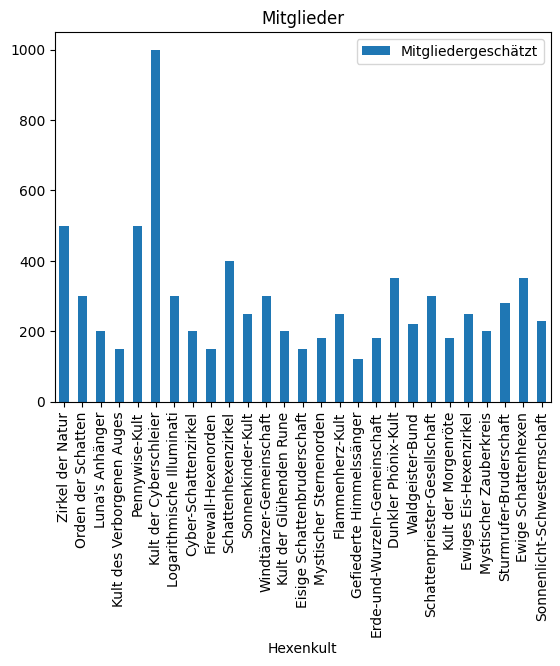

In [14]:
ziegen = hexen_2[hexen_2.Ziegen == False]
len(ziegen)

ziegen.plot.bar(title='Mitglieder', x='Hexenkult')